In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


Cantidad de primera dosis aplicadas hasta el momento es de:  4661085
Cantidad de segunda dosis aplicadas hasta el momento es de:  728915
Cantidad de dosis aplicadas hasta el momento (1ra y 2da dosis):  5390000
Promedio de personas vacunadas con 1ra dosis:  10.18 %
Promedio de personas vacunadas con 2ra dosis:  1.59 %
Promedio de personas vacunas con 1ra y 2da dosis:  11.77 %


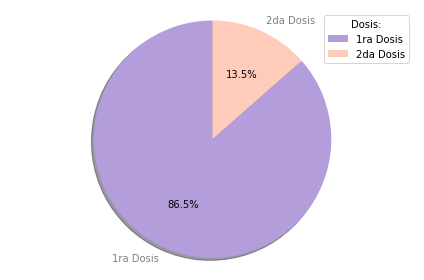

In [36]:
#leemos el dataset y creamos nuestro dataframe con estos datos
url="https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19VacunasAgrupadas.csv"
data=pd.read_csv(url,delimiter= ",")

#Agrupamos total de vacunas por jurisdiccion 
df1 = data.groupby("jurisdiccion_nombre", as_index=False).sum()

dosis1 = df1[['primera_dosis_cantidad']].sum()
dosis2 = df1[['segunda_dosis_cantidad']].sum()

total1 = int(dosis1)
total2 = int(dosis2)

#poblacion estimada al 1 julio (INDEC)
habitantes = 45808747

total_dosis = total1+total2
print("Cantidad de primera dosis aplicadas hasta el momento es de: ", total1)
print("Cantidad de segunda dosis aplicadas hasta el momento es de: ", total2)
print("Cantidad de dosis aplicadas hasta el momento (1ra y 2da dosis): ",total_dosis )
print("Promedio de personas vacunadas con 1ra dosis: ", round(total1*100/habitantes,2),"%" )
print("Promedio de personas vacunadas con 2ra dosis: ", round(total2*100/habitantes,2),"%" )
print("Promedio de personas vacunas con 1ra y 2da dosis: ", round(total_dosis*100/habitantes,2),"%")

#labels
labels = ['1ra Dosis','2da Dosis']
#add colors
colors = ['#B39DDB','#FFCCBC']
totales = np.array([df1[['primera_dosis_cantidad']].sum(),df1[['segunda_dosis_cantidad']].sum()])

fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(totales, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')

plt.legend(title = "Dosis:")
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

